# DataBpy 1

In [104]:
import bpy
bpy.app.version_string # current blender version

'4.4.3'

In [105]:
# setup for the docs

import runpy # Helper functions just for the docs
module = runpy.run_path("/Users/jan-hendrik/projects/bpy-gallery/docs/render_utils.py")
globals().update(module)


import sys
from pathlib import Path
#subprocess.check_call([sys.executable, "-m", "pip", "install", "polars"])
#subprocess.check_call([sys.executable, "-m", "pip", "install", "databpy"])

# Set render resolution
bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

def camera_from_above():
    camera = bpy.context.scene.camera
    camera.location = (6, 4, 10)  # Position above the XY plane
    camera.rotation_euler = (0, 0, 0)  # Rotate to look at XY plane
    # Set the camera to orthographic mode
    camera.data.type = 'ORTHO'
    # Set the orthographic scale to 12
    camera.data.ortho_scale = 9

    bpy.context.scene.render.resolution_x = 300
    bpy.context.scene.render.resolution_y = 300

# use local databpy
project_root = Path.home() / "projects/databpy/"
sys.path.append(str(project_root))

import databpy
databpy.__file__

'/Users/jan-hendrik/projects/databpy/databpy/__init__.py'


# Loading Pre-Defined Geometry Nodes
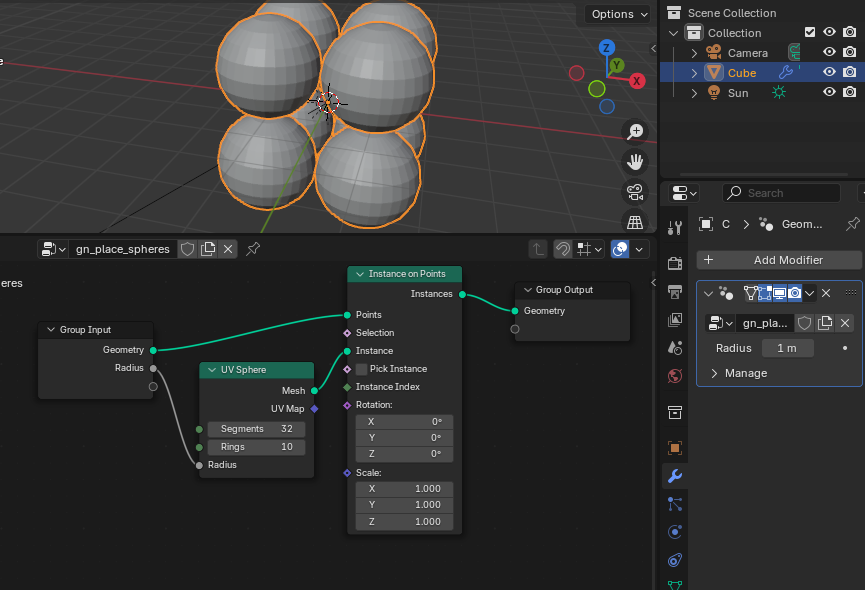



In [106]:
import databpy as db

In [107]:
blend_file = Path.home() / "projects/bpy-gallery/docs/cube_gn_position.blend"
node_group_name = "gn_place_spheres"

node_group_place_spheres = db.nodes.append_from_blend(node_group_name, blend_file)

for node in node_group_place_spheres.nodes:
    print(node.name)

Appending gn_place_spheres from /Users/jan-hendrik/projects/bpy-gallery/docs/cube_gn_position.blend
Group Input
Group Output
Instance on Points
UV Sphere


SinglePoint


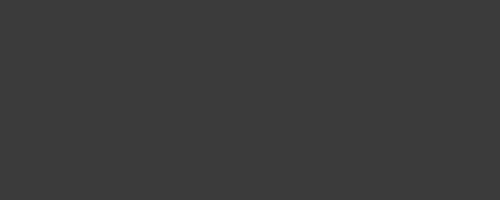

In [108]:
fresh_scene()

import numpy as np
single_vertex = np.array([[6, 4, 0]])

# Create a mesh object with the single vertex
my_point_obj = db.create_object(single_vertex, name="SinglePoint")

# Print the name of the created object
print(my_point_obj.name)

render_result()

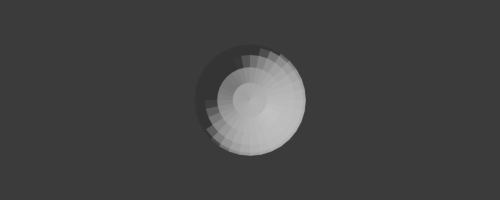

In [109]:
modifier = my_point_obj.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = node_group_place_spheres
render_result()

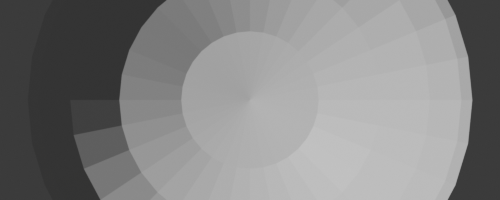

In [110]:
my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 4 # set radius
render_result()

In [111]:
import polars as pl
url = 'https://raw.githubusercontent.com/kolibril13/ipydrop/refs/heads/main/dino.csv'
df1 = pl.read_csv(url)
length_data = len(df1)

# Scale and transform the coordinates from the dataframe
x = df1['x'] / 10
y = df1['y'] / 10 * 0.8

print(f"Loaded {length_data} rows")
df1.head()

Loaded 142 rows


x,y
f64,f64
55.3846,97.1795
51.5385,96.0256
46.1538,94.4872
42.8205,91.4103
40.7692,88.3333


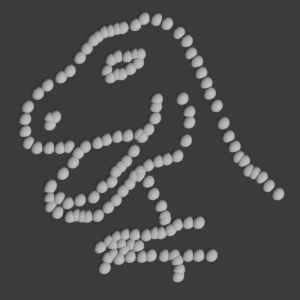

In [112]:
fresh_scene()

# Create 3D points with z=0
coords = np.array(list(zip(x, y, [0]*len(x))))

my_point_obj = db.create_object(coords, name="Deno")

modifier = my_point_obj.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = node_group_place_spheres

my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 0.2  # Set radius

camera_from_above()
render_result()

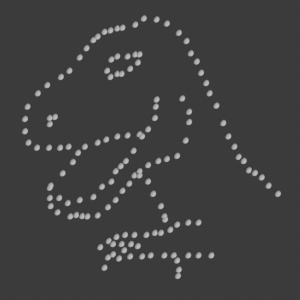

In [113]:
my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 0.1  # Set radius

render_result()

In [114]:
# Also possible to change the data points
import polars as pl
url = 'https://raw.githubusercontent.com/kolibril13/ipydrop/refs/heads/main/star.csv'
df = pl.read_csv(url)

x = df['x'] / 10 
y = df['y'] / 10 * 0.8

df.head()

x,y
f64,f64
58.213608,91.881892
58.196054,92.214989
58.718231,90.310532
57.278373,89.907607
58.08202,92.008145


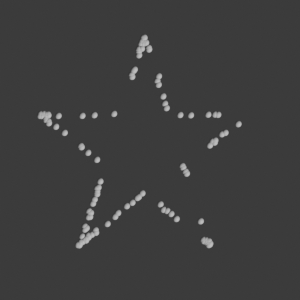

In [ ]:
coords = np.array(list(zip(x, y, [0]*len(x))))

db.store_named_attribute(my_point_obj, coords, "position")
my_point_obj.data.update()
bpy.context.view_layer.update()

render_result()